In [1]:
!pip install --upgrade dagshub mlflow imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 64.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 105.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 93.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [3]:
df_train_id = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df_train_tr = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

# Join datasets

In [36]:
df = pd.merge(df_train_tr, df_train_id, on='TransactionID', how='inner')

In [4]:
from sklearn.model_selection import train_test_split

X = df_train_tr.drop(columns=['isFraud'])
y = df_train_tr['isFraud']

# Get unique card1 values
unique_card1s = df_train_tr['card1'].unique()

# Split card1 values into train/val/test
card1_train, card1_temp = train_test_split(unique_card1s, test_size=0.4, random_state=42)
card1_val, card1_test = train_test_split(card1_temp, test_size=0.5, random_state=42)

# Filter dataframe
X_transaction_train_df = X[df_train_tr['card1'].isin(card1_train)].copy()
y_transaction_train_df = y[df_train_tr['card1'].isin(card1_train)].copy()

X_transaction_val_df = X[df_train_tr['card1'].isin(card1_val)].copy()
y_transaction_val_df = y[df_train_tr['card1'].isin(card1_val)].copy()

X_transaction_test_df = X[df_train_tr['card1'].isin(card1_test)].copy()
y_transaction_test_df = y[df_train_tr['card1'].isin(card1_test)].copy()

In [5]:
# In data description there was this list for categorical columns, 
# but there ar not all categorical, some of them are int or floats
cat_cols = [
    "ProductCD",
    "card1",
    "card2",
    "card3",
    "card4",
    "card5",
    "card6",
    "addr1",
    "addr2",
    "P_emaildomain",
    "R_emaildomain",
    "M1",
    "M2",
    "M3",
    "M4",
    "M5",
    "M6",
    "M7",
    "M8",
    "M9",
]

In [6]:
categorical_columns = [col for col in X_transaction_train_df.columns if X_transaction_train_df[col].dtype == 'object']
numerical_columns = [col for col in X_transaction_train_df.columns if X_transaction_train_df[col].dtype != 'object']

In [7]:
categorical_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [8]:
len(categorical_columns) + len(numerical_columns) == len(X_transaction_train_df.columns)

True

In [9]:
X_transaction_train_df[categorical_columns].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T


In [10]:
for col in categorical_columns:
    print(f'{col}: (count = {len(X_transaction_train_df[col].unique())}) {X_transaction_train_df[col].unique()}')
    print('')

ProductCD: (count = 5) ['W' 'H' 'C' 'S' 'R']

card4: (count = 5) ['mastercard' 'visa' 'american express' 'discover' nan]

card6: (count = 5) ['credit' 'debit' 'charge card' 'debit or credit' nan]

P_emaildomain: (count = 60) ['gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'hotmail.com' 'aol.com'
 'me.com' nan 'anonymous.com' 'comcast.net' 'cox.net' 'charter.net'
 'rocketmail.com' 'optonline.net' 'icloud.com' 'live.com.mx' 'att.net'
 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'juno.com'
 'earthlink.net' 'hotmail.es' 'live.com' 'verizon.net' 'roadrunner.com'
 'netzero.net' 'gmx.de' 'suddenlink.net' 'frontiernet.net'
 'windstream.net' 'prodigy.net.mx' 'frontier.com' 'gmail' 'aim.com'
 'mac.com' 'web.de' 'netzero.com' 'embarqmail.com' 'cableone.net'
 'twc.com' 'yahoo.de' 'cfl.rr.com' 'yahoo.es' 'live.fr' 'yahoo.co.uk'
 'hotmail.fr' 'outlook.es' 'hotmail.co.uk' 'yahoo.fr' 'protonmail.com'
 'sc.rr.com' 'ptd.net' 'yahoo

In [63]:
high_nan_cols = X_transaction_train_df.columns[X_transaction_train_df.isna().mean() > 0.85]
all_nan_columns = X_transaction_train_df.columns[X_transaction_train_df.isna().mean() != 0]

print(f'{len(high_nan_cols)}: {high_nan_cols}')

55: Index(['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148',
       'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
       'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330',
       'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'],
      dtype='object')


In [64]:
columns_to_delete = ['TransactionID']
columns_to_delete.extend(high_nan_cols)

len(columns_to_delete)

56

In [72]:
X_corr_trans = X_transaction_train_df[numerical_columns].copy()
X_corr_trans['isFraud'] = y_transaction_train_df

In [73]:
%%time

corr_matrix = X_corr_trans.corr().abs()

CPU times: user 2min 7s, sys: 426 ms, total: 2min 7s
Wall time: 2min 7s


In [76]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find feature pairs with correlation greater than a threshold
threshold = 0.95
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# To remove one feature from each highly correlated pair
# (typically the one with lower correlation with target)
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    # Compare correlation with target
    if abs(X_corr[feat1].corr(y)) < abs(X_corr_trans[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

Highly correlated feature pairs:
TransactionID and TransactionDT: 0.9983
C1 and C2: 0.9947
C1 and C4: 0.9654
C1 and C6: 0.9808
C1 and C8: 0.9651
C1 and C10: 0.9547
C1 and C11: 0.9964
C2 and C4: 0.9697
C2 and C6: 0.9726
C2 and C8: 0.9737
C2 and C10: 0.9680
C2 and C11: 0.9933
C4 and C6: 0.9600
C4 and C8: 0.9549
C4 and C11: 0.9726
C6 and C11: 0.9904
C6 and C14: 0.9838
C7 and C8: 0.9805
C7 and C10: 0.9827
C7 and C12: 0.9995
C8 and C10: 0.9966
C8 and C11: 0.9590
C8 and C12: 0.9806
C10 and C11: 0.9515
C10 and C12: 0.9816
C11 and C14: 0.9613
D1 and D2: 0.9820
D4 and D6: 0.9548
D4 and D12: 1.0000
D5 and D7: 0.9860
D6 and D12: 0.9732
V10 and V11: 0.9663
V15 and V16: 0.9865
V15 and V33: 0.9579
V15 and V57: 0.9591
V15 and V94: 0.9526
V17 and V18: 0.9899
V17 and V21: 0.9571
V21 and V22: 0.9515
V21 and V84: 0.9556
V27 and V28: 0.9693
V28 and V68: 0.9711
V28 and V89: 0.9682
V29 and V30: 0.9561
V31 and V32: 0.9862
V31 and V50: 0.9808
V31 and V71: 0.9592
V31 and V92: 0.9640
V32 and V50: 0.9587
V33 and

NameError: name 'X_corr' is not defined

# Preprocessor

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns, numerical_columns, del_cols):
        self.categorical_columns = categorical_columns
        self.numerical_columns = numerical_columns
        self.del_cols = del_cols

    def fit(self, X, y):
        self.woe_columns = self.categorical_columns
        
        df_woe = X.copy()
        target_col = 'isFraud'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            if col in self.del_cols:
                continue
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        X_transformed = X_transformed.fillna(value={col: 0 for col in self.numerical_columns})

        woe_encoded_cols = {}
        for col in self.woe_columns:
            if col in self.del_cols:
                continue
            # X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            woe_encoded_cols[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col]).fillna(0)
            X_transformed.drop(columns=col, inplace=True)

        X_transformed = pd.concat([X_transformed, pd.DataFrame(woe_encoded_cols, index=X_transformed.index)], axis=1)
        X_transformed = X_transformed.drop(columns = self.del_cols)

        assert not X_transformed.isna().any().any()

        return X_transformed
        

# Pipeline (Imbalanced Learn)

In [66]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
preprocessor = Preprocessor(categorical_columns, numerical_columns, columns_to_delete)

sampler = RandomUnderSampler(random_state=42, sampling_strategy=0.2)

# Imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('undersampler', sampler),  # Undersampling step
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_transaction_train_df, y_transaction_train_df)


Pipeline(steps=[('undersampler',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.2)),
                ('preprocess',
                 Preprocessor(categorical_columns=['ProductCD', 'card4',
                                                   'card6', 'P_emaildomain',
                                                   'R_emaildomain', 'M1', 'M2',
                                                   'M3', 'M4', 'M5', 'M6', 'M7',
                                                   'M8', 'M9'],
                              del_cols=['TransactionID', 'dist2', 'D6', 'D7',
                                        'D8', 'D9', 'D12', 'D13', 'D14', 'V138',
                                        'V139', 'V140', 'V141', 'V142...
                                        'V154', 'V155', 'V156', 'V157', 'V158', ...],
                              numerical_columns=['TransactionID',
                                                 'TransactionDT',
                                                 'TransactionAmt', 'card1',
                                                 'card2', 'card3', 'card5',
                                                 'addr1', 'addr2', 'dist1',
                                                 'dist2', 'C1', 'C2', 'C3',
                                                 'C4', 'C5', 'C6', 'C7', 'C8',
                                                 'C9', 'C10', 'C11', 'C12',
                                                 'C13', 'C14', 'D1', 'D2', 'D3',
                                                 'D4', 'D5', ...])),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [67]:
preds_train = pipeline.predict_proba(X_transaction_train_df)[:, 1]
preds_val = pipeline.predict_proba(X_transaction_val_df)[:, 1]
preds_test = pipeline.predict_proba(X_transaction_test_df)[:, 1]

# Calculate AUC score

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

def plot_roc_and_get_metrics(y_true, y_pred_proba, threshold=0.5, title='ROC Curve & Metrics', save_path=None):
    """
    Plots ROC curve, saves it (optional), prints and returns classification metrics.

    Parameters:
    - y_true: array-like — True binary labels
    - y_pred_proba: array-like — Predicted probabilities for positive class
    - threshold: float — Threshold for binary classification
    - title: str — Plot title
    - save_path: str — If provided, saves ROC curve to this file path

    Returns:
    - dict of metrics
    """
    y_pred = (y_pred_proba >= threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    metrics = {
        "accuracy": round(accuracy_score(y_true, y_pred), 4),
        "precision": round(precision_score(y_true, y_pred), 4),
        "recall": round(recall_score(y_true, y_pred), 4),
        "specificity": round(specificity, 4),
        "f1_score": round(f1_score(y_true, y_pred), 4),
        "auc": round(roc_auc, 4)
    }

    for k, v in metrics.items():
        print(f"{k.capitalize():<12}: {v}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()

    if save_path:
        plt.savefig(save_path)
    plt.show()

    return metrics


Accuracy    : 0.9715
Precision   : 0.733
Recall      : 0.2966
Specificity : 0.9961
F1_score    : 0.4223
Auc         : 0.8662


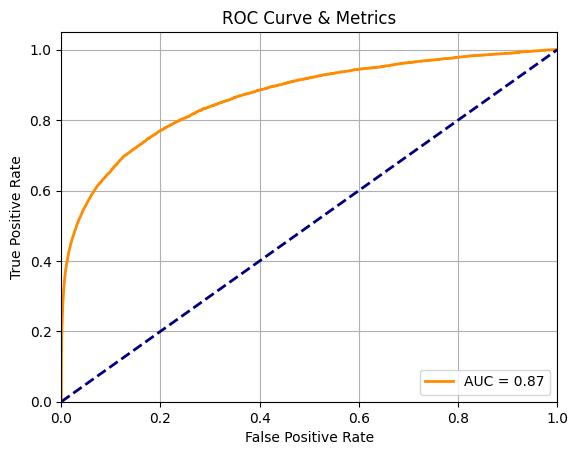

Accuracy    : 0.9643
Precision   : 0.5767
Recall      : 0.3134
Specificity : 0.9907
F1_score    : 0.4061
Auc         : 0.8546


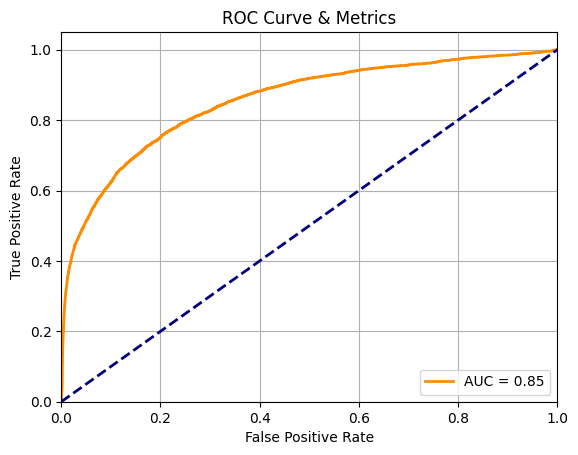

Accuracy    : 0.971
Precision   : 0.6237
Recall      : 0.181
Specificity : 0.9965
F1_score    : 0.2806
Auc         : 0.8013


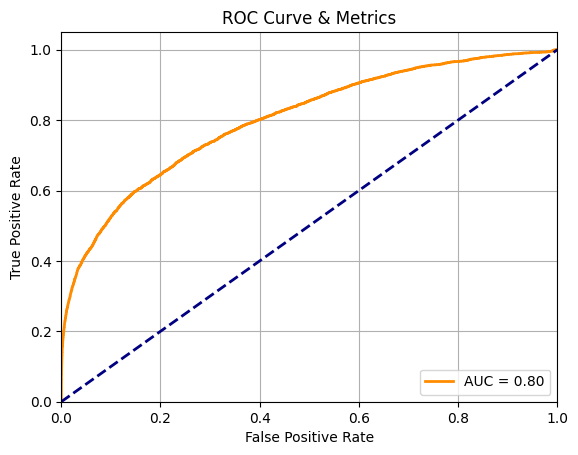

In [69]:
plot_roc_and_get_metrics(y_transaction_train_df, preds_train, threshold=0.8)
plot_roc_and_get_metrics(y_transaction_val_df, preds_val, threshold=0.8)
metrics_for_test_set = plot_roc_and_get_metrics(y_transaction_test_df, preds_test, threshold=0.8)

# Save On MLflow

In [31]:
import dagshub
dagshub.init(repo_owner='nmach22', repo_name='Fraud-Detection-ml', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=a59b9375-64bc-4a6a-a46f-049044afe0ca&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=fadd21a1de1f87abf0b6cbb3c98c337f7c987976fcb62915a5cd866354466c5a




Accessing as nmach22

Initialized MLflow to track repo "nmach22/Fraud-Detection-ml"

Repository nmach22/Fraud-Detection-ml initialized!

Accuracy    : 0.9616
Precision   : 0.3591
Recall      : 0.2949
Specificity : 0.983
F1_score    : 0.3239
Auc         : 0.8013


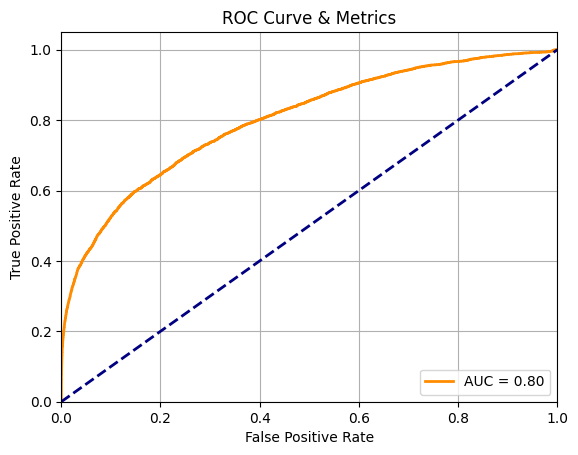

Accuracy    : 0.9624
Precision   : 0.4634
Recall      : 0.4475
Specificity : 0.9811
F1_score    : 0.4553
Auc         : 0.8662


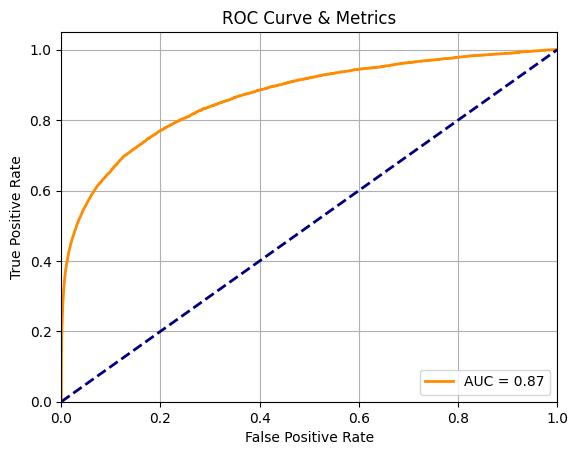

/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run fill nans with 0, woe encoding, remove high nan columns, with RandomUnderSampler (identity.csv not used) at: https://dagshub.com/nmach22/Fraud-Detection-ml.mlflow/#/experiments/0/runs/2e68f8e3abc3462b86021d3eb601cd19
🧪 View experiment at: https://dagshub.com/nmach22/Fraud-Detection-ml.mlflow/#/experiments/0


In [41]:
import mlflow 
from mlflow.models.signature import infer_signature

model_name = type(model).__name__
model_params = model.get_params()

sampler_name = type(sampler).__name__
sampler_params = sampler.get_params()


experiment_name = model_name + '_Pipeline'
run_name = 'fill nans with 0, woe encoding, remove high nan columns, with RandomUnderSampler (identity.csv not used)'

roc_plot_test_path = "roc_curve_test.png"
metrics_for_test_set = plot_roc_and_get_metrics(
    y_transaction_test_df, 
    preds_test, 
    save_path=roc_plot_test_path
)

roc_plot_train_path = "roc_curve_train.png"
metrics_for_train_set = plot_roc_and_get_metrics(
    y_transaction_train_df, 
    preds_train, 
    save_path=roc_plot_train_path
)

mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):
    # Log parameters
    mlflow.log_param("fillna_numerical_value", 0)
    mlflow.log_param("removed columns", columns_to_delete)
    
    mlflow.log_param("model_name", model_name)
    for param in model_params:
        mlflow.log_param(f'{model_name}_{param}' , model_params[param])
    
    mlflow.log_param("sampler_name", sampler_name)
    for param in sampler_params:
        mlflow.log_param(f'{sampler_name}_{param}', sampler_params[param])

    # Log metrics for test
    for metric_name, metric_value in metrics_for_test_set.items():
        mlflow.log_metric(f'test_{metric_name.capitalize()}', metric_value)

    # Log metrics for train
    for metric_name, metric_value in metrics_for_train_set.items():
        mlflow.log_metric(f'train_{metric_name.capitalize()}', metric_value)

    input_example = X_transaction_train_df.head(1)
    signature = infer_signature(X_transaction_train_df, pipeline.predict_proba(X_transaction_train_df))
    
    # Log model
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="pipeline",
        input_example=input_example,
        signature=signature
    )

    # Log ROC plot as artifact
    mlflow.log_artifact(roc_plot_test_path)
    mlflow.log_artifact(roc_plot_train_path)